In [ ]:
# prompt: generate code to unzip files /content/sample_data/DSW ML Test-APSIT.zip

!unzip -j /content/sample_data/DSW\ ML\ Test-APSIT.zip -d /content


Archive:  /content/sample_data/DSW ML Test-APSIT.zip
  inflating: /content/DSW - ML Assignment v2.pdf  
  inflating: /content/historic.csv   
  inflating: /content/prediction_input.csv  


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("historic.csv")
df.head()

,item_no,category,main_promotion,color,stars,success_indicator
0,739157,Tunic,Catalog,Green,3.1,flop
1,591846,Hoodie,Category_Highlight,Red,1.5,flop
2,337574,Sweatshirt,Catalog,Red,4.4,top
3,401933,Polo-Shirt,Category_Highlight,Blue,3.1,flop
4,812151,Hoodie,Category_Highlight,Green,4.1,top


In [8]:
df.shape


(8000, 6)

In [9]:
df.duplicated().sum()

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   item_no            8000 non-null   int64  
 1   category           8000 non-null   object 
 2   main_promotion     8000 non-null   object 
 3   color              8000 non-null   object 
 4   stars              8000 non-null   float64
 5   success_indicator  8000 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 375.1+ KB


In [11]:
df.describe()

,item_no,stars
count,8000.000000,8000.000000
mean,546474.338375,3.473075
std,256513.463874,0.978810
min,100171.000000,0.300000
25%,325001.500000,2.800000
50%,547081.000000,3.500000
75%,764312.250000,4.200000
max,989740.000000,6.100000


In [12]:
df.nunique()

item_no              8000
category                6
main_promotion          4
color                  10
stars                  57
success_indicator       2
dtype: int64

In [13]:
print(df['category'].unique())

['Tunic' 'Hoodie' 'Sweatshirt' 'Polo-Shirt' 'T-Shirt' 'Blouse']


In [14]:
print(df['main_promotion'].unique())

['Catalog' 'Category_Highlight' 'Display_Ad_Campaign' 'Frontpage_Header']


In [15]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

In [16]:
# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 2 numerical features : ['item_no', 'stars']

We have 4 categorical features : ['category', 'main_promotion', 'color', 'success_indicator']


<Axes: xlabel='category'>

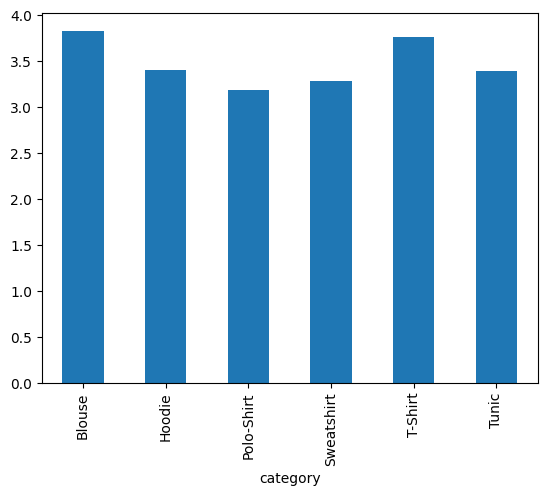

In [17]:
df.groupby('category')['stars'].mean().plot(kind='bar')

<Axes: xlabel='color'>

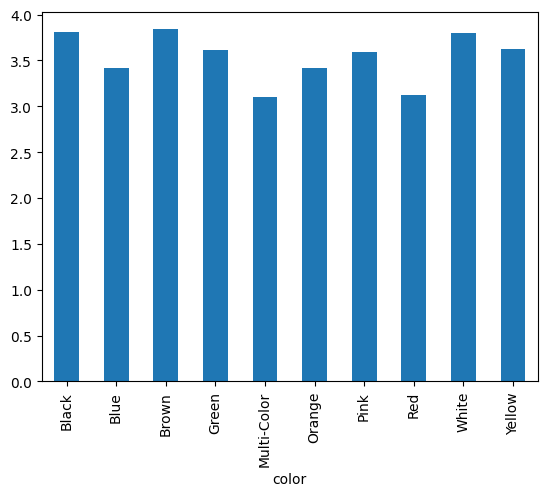

In [18]:
# prompt: plot the average rating for each colour

df.groupby('color')['stars'].mean().plot(kind='bar')


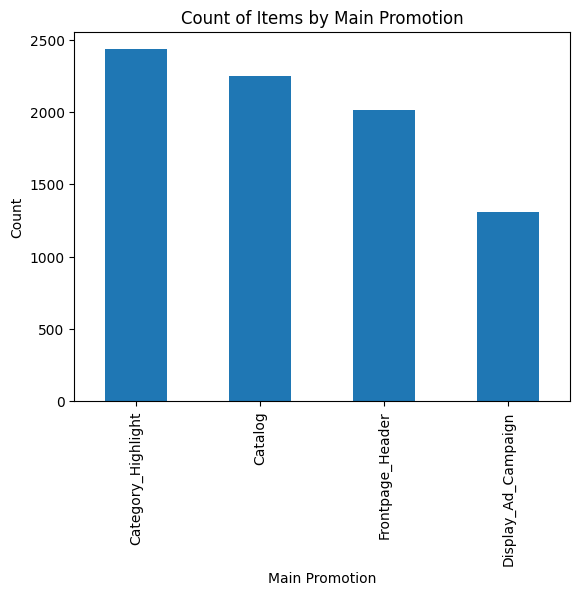

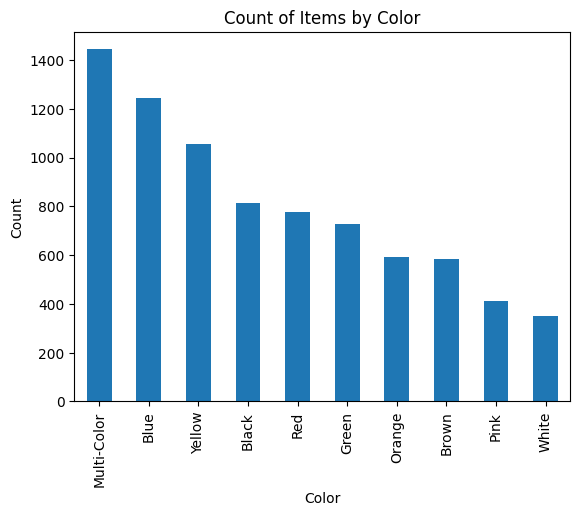

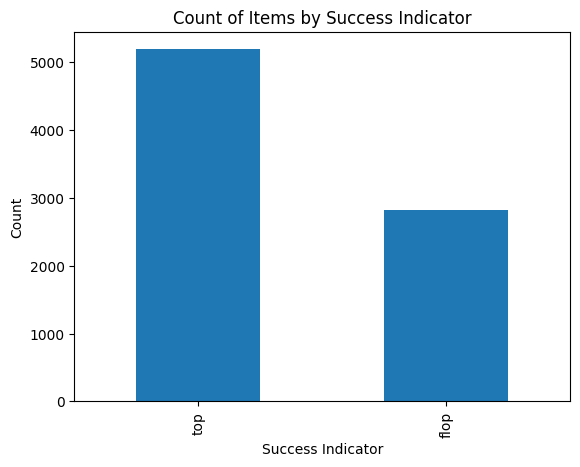

In [19]:
df['main_promotion'].value_counts().plot(kind='bar')
plt.xlabel('Main Promotion')
plt.ylabel('Count')
plt.title('Count of Items by Main Promotion')
plt.show()

df['color'].value_counts().plot(kind='bar')
plt.xlabel('Color')
plt.ylabel('Count')
plt.title('Count of Items by Color')
plt.show()

df['success_indicator'].value_counts().plot(kind='bar')
plt.xlabel('Success Indicator')
plt.ylabel('Count')
plt.title('Count of Items by Success Indicator')
plt.show()


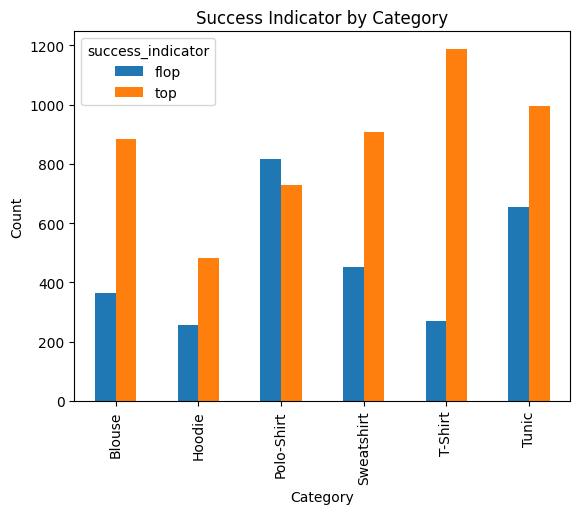

In [20]:
df.groupby(['category', 'success_indicator'])['success_indicator'].count().unstack().plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Success Indicator by Category')
plt.show()


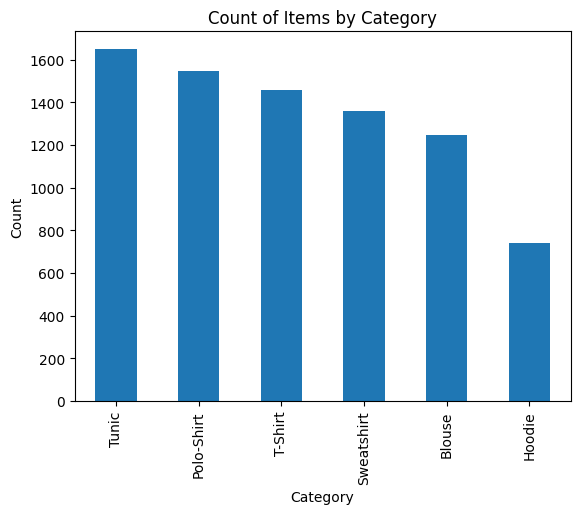

In [21]:
# Plot bar charts for categorical features
df['category'].value_counts().plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Count of Items by Category')
plt.show()

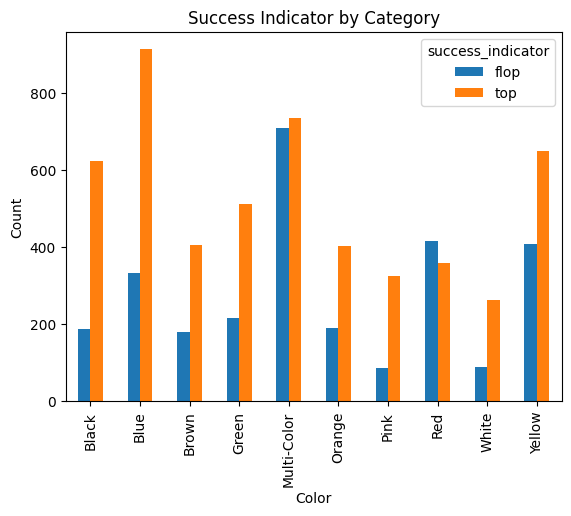

In [22]:
df.groupby(['color', 'success_indicator'])['success_indicator'].count().unstack().plot(kind='bar')
plt.xlabel('Color')
plt.ylabel('Count')
plt.title('Success Indicator by Category')
plt.show()

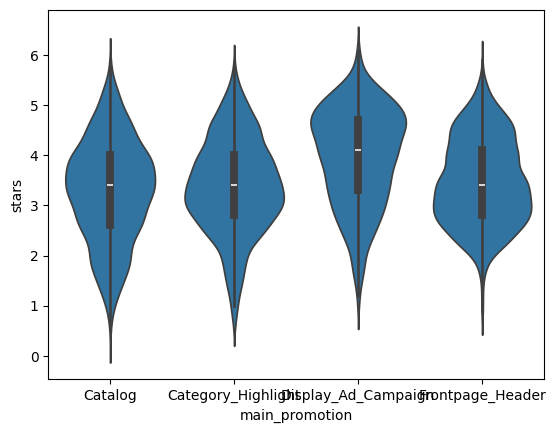

In [23]:
# prompt: plot volin plot form seabon for each promotion against sucess

sns.violinplot(x = "main_promotion", y = "stars", data = df)
plt.show()


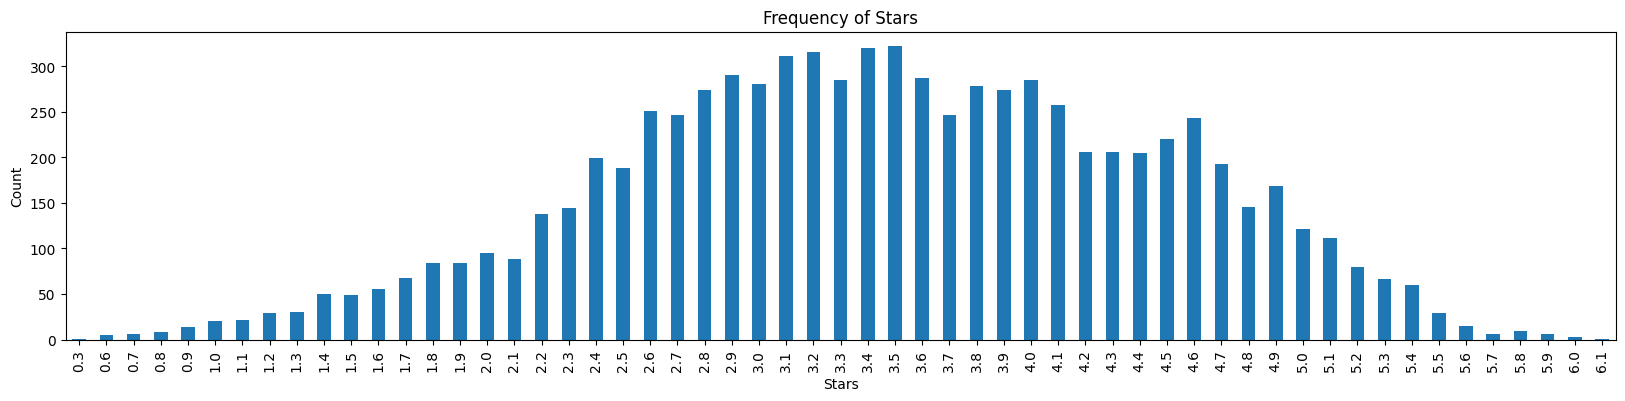

In [24]:
# prompt: plot frequency of stars between 0-5 change size of fig 20,4 give in sorted on x axis

import matplotlib.pyplot as plt
df['stars'].value_counts().sort_index().plot(kind='bar', figsize=(20, 4))
plt.xlabel('Stars')
plt.ylabel('Count')
plt.title('Frequency of Stars')
plt.show()


In [ ]:
import plotly.express as px

In [25]:
# prompt: do numeric encoding to colour

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['color'] = le.fit_transform(df['color'])
df['success_indicator']= le.fit_transform(df['success_indicator'])
df.head()


,item_no,category,main_promotion,color,stars,success_indicator
0,739157,Tunic,Catalog,3,3.1,0
1,591846,Hoodie,Category_Highlight,7,1.5,0
2,337574,Sweatshirt,Catalog,7,4.4,1
3,401933,Polo-Shirt,Category_Highlight,1,3.1,0
4,812151,Hoodie,Category_Highlight,3,4.1,1


In [26]:
X = df.drop(columns=['success_indicator'],axis=1)
y= df.success_indicator

In [27]:
X.head()


,item_no,category,main_promotion,color,stars
0,739157,Tunic,Catalog,3,3.1
1,591846,Hoodie,Category_Highlight,7,1.5
2,337574,Sweatshirt,Catalog,7,4.4
3,401933,Polo-Shirt,Category_Highlight,1,3.1
4,812151,Hoodie,Category_Highlight,3,4.1


In [28]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),
    ]
)

In [29]:
X = preprocessor.fit_transform(X)

In [30]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((6400, 13), (1600, 13))

In [31]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
